# Project: Investigate a Dataset (TMDB 10000 Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> ### Herein lies the power of data!
> *Can I use data analysis to explore what led the movie industry - in the previous period - to get to where it is?* That's the question that hit my ears when I found this dataset among the available datasets. This is an area I'm not interested in as theatre, nevertheless, it's an exciting challenge for me.
>
> A first look at the dataset in question found data for the titles of more than 10,000 movies, their genre, actors, crew, year of release, budget, revenue in the year of release of the movie and its equivalent in 2010, popularity, rating of each movie, and number of votes, etc.
>
> First of all, I assume that the decade most released for movies is the most profitable decade, so I will make sure of that, and whatever the outcome, the most profitable decade will be the one under study.
>
> The questions that I thought would help me reach satisfactory results with regard to my initial question are:
> ##### - Decades vs. Relased Movies:
>   1) Which decade had the most movies released?
> ##### - Decade with Result vs. Profit: *Get Profitable (Study Decade)*
>   2) Is that decade having the most profit average?
> ##### - Study Decade vs. Rate:
>   3) Does highest-profit movie in most profitable decade has highest-rated ever?
> ##### - Profit vs. Popularity:
>   4) Is there a correlation between top 100 high-profit movies in most profit decade and popularity?
> ##### - Popularity vs. Genres:
>   5) Which is the most popular genre among the movies whose popularity exceeded third quartile?
>   6) How many movies belong to this genre according to this measure?
> ##### - Production Companies vs. Profit:
>   7) What highest 5 companies contributed to the most profitable movies (as a count)?
>   8) Which one got highest profit?
>   9) Is there a corelation between number of co-production companies and high profits?
> ##### - Runtime vs. Rate:
>  10) How has movie ratings - in all decades - affected by movie length?
>  11) What about study decade?
> ##### - Proposed Research:
>    - What is the difference between the adjusted profit to budget and the profit to budget?
>
> **Now let's take a look at how we can answer these questions!**

In [1622]:
# First, let's start by importing a bunch of packages:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

 ### Explore
 - Let's load the data, and explore what can we do with it.

> ### General Properties

In [1623]:
# load data:

df = pd.read_csv('tmdb-movies.csv')

#----------------------------------------------------------------------------------#

# Take a look at the shape of the data:

df.shape

(10866, 21)

In [1624]:
# Display a top 3 rows of data:

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [1625]:
# Display a last 3 rows of data:

df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [1626]:
# Discover data types:

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [1627]:
# Check missing values:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [1628]:
# Check duplicate rows:

print('Count of duplicate rows is: {}'.format(len(df)-len(df.drop_duplicates())))

Count of duplicate rows is: 1


#### So..
>
##### We have a dataset of 10,866 rows and 21 columns with:

1) Columns **not essential** in answering our questions:
* 'imdb_id'
* 'homepage'
* 'tagline'
* 'overview'
* 'keywords'

2) Cells with **zero values** in columns:
* 'budget'
* 'revenue'
* 'budget_adj'
* 'revenue_adj'
3) One **duplicate** row.

4) Columns with **missing values**:
* 'director'
* 'cast'
* 'genres'
* 'production_companies'

5) A column needs to modify the **data type**:
* 'release_date'

6) Some columns need to **extract** as our need:
* 'profit'
* 'decade'
* 'profit_adj'
* 'comp_count'

 ### Clean
 - Now is the time to clean up some of the things that may hinder our progress in analysis.

> ### Dropping
> - Not essential:
> > As my analysis targets the movies industry in its most profit decade from a narrow scope asocited with production and does'nt touch on movie criticism, I'll drop these columns.
> - Zero values:
> > Again, my analysis targets budgets, revenues and profits, and I think it's unfair to fill these missing values in these important columns with average, I assume that these movies are of little weight in the equation, so it's okay to specify the sample further.
> - Duplicate:
> > That's a given.

In [1629]:
# First let's make a copy of data, We might need it.

df_copy = df.copy()

#----------------------------------------------------------------------------------#

# Then drop columns:

df.drop(['imdb_id',
         'homepage',
         'tagline',
         'overview',
         'keywords'],
        axis=1,
        inplace=True)

#----------------------------------------------------------------------------------#

# Drop duplicate row:

df.drop_duplicates(inplace=True)

#----------------------------------------------------------------------------------#

# Drop missing values of budget and revenue:

df = df.loc[(df[['budget', 'revenue']] != 0).all(axis=1)]


#----------------------------------------------------------------------------------#

# Check replacing missing values with "Unknown":
print('Now dataframe shape is: {}'.format(df.shape))

Now dataframe shape is: (3854, 16)


> ### Replacing
> - Missing values:
> > They are necessary for the sample, but names that we can consider 'unknown'.

In [1630]:
# Replace 'director', 'cast', 'genres', and 'production_companies' missing values with "Unknown":

## as these columns do not contain statistics but names.

df.replace(np.nan, 'Unknown', inplace=True)

#----------------------------------------------------------------------------------#

# Check replacing missing values with "Unknown":

unknown = (
    
len(df[df['director']=='Unknown'])
    ,
len(df[df['cast']=='Unknown'])
    ,
len(df[df['genres']=='Unknown'])
    ,
len(df[df['production_companies']=='Unknown'])

)

#----------------------------------------------------------------------------------#

# Print some words:

print('Unknown values in "director", "cast", "genres" and "production_companies" is: {}'.format(unknown))

Unknown values in "director", "cast", "genres" and "production_companies" is: (1, 4, 0, 46)


> ### Changing
> - Data types:
> > Change 'release_date' column to 'datetime' and 'id' column to 'str'.

In [1631]:
# Change 'release_date' type to datetime:

df['release_date'] = pd.to_datetime(df['release_date'])


## Check changes:

print('Now "release_date" type is: {}.'.format(df['release_date'].dtypes))

#----------------------------------------------------------------------------------#

# Change 'id' data type from int to str:

df['id'] = df['id'].astype(str)


## Check changes:

print('And "id" type is: {}.'.format(df['id'].dtypes))

Now "release_date" type is: datetime64[ns].
And "id" type is: object.


> ### Generating
> - Extract:
> > - Since we only have a 'budget' and the 'revenue', we need to extract 'profit' from them.
> > - We'll also need to group the years in a new column called 'decade'.
> > - Because the 'vote_count' varies greatly, it doesn't make sense to rely on 'vote_average', so I found a good solution to get [Weighted Rating](https://math.stackexchange.com/questions/169032/understanding-the-imdb-weighted-rating-function-for-usage-on-my-own-website).

In [1632]:
# Calculate profit:

df['profit'] = df['revenue'] - df['budget']


# Check changes:

profit_avg = df['profit'].mean()
print('Now we have profit with average: {}'.format(profit_avg))

#----------------------------------------------------------------------------------#

# Extract 'decades' from 'release_year'

df['decade'] = ((df['release_year']//10)*10).astype(str)+"'s"


# Check changes:

decade_sample = df['decade'].sample(1)
print('And decades such: {}'.format(decade_sample.to_string(index=False)))

#----------------------------------------------------------------------------------#

# Calculate 'rate'>>
## According to 'Weighted Rating' we have to find average of vote_average and appoint an minimum votes:

### First calculate mean 'vote_average':

vote_mean = df['vote_average'].mean()


#### Then find minimum votes based on top 50 'vote_count':
##### I choosed top 50.

top_votes = df.nlargest(50, 'vote_count')

min_votes = top_votes['vote_count'].min()


# Finally extract 'rate':

df['rate'] = (
    
    (df['vote_count']/
     (df['vote_count'] + min_votes)) * vote_mean
    
    +
    
    (df['vote_count']/
     (df['vote_count'] + min_votes)) * vote_mean
    
)


# Check changes:

rate_max = df['rate'].max()
print('And rate with maximum: {}'.format(rate_max))

Now we have profit with average: 70482919.14322782
And decades such: 2010's
And rate with maximum: 8.781349392767508


Here are top 5 movies by rate:



,rate
original_title,
Inception,8.781349
The Avengers,8.542452
Avatar,8.406433
The Dark Knight,8.398183
Django Unchained,8.030753


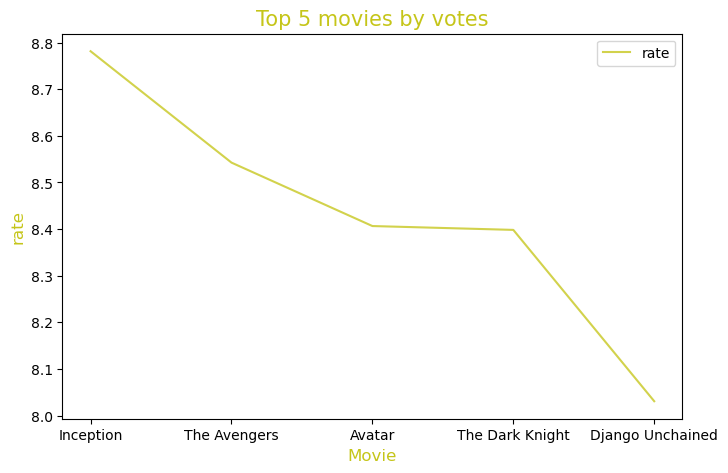

In [1633]:
# We can plot top 5 movies by rate quickly:

## Find top f rates:
top_votes = df.nlargest(5, 'rate')

#----------------------------------------------------------------------------------#

# Make a dataframe grouped by movie title and votes:

top_votes = pd.DataFrame(top_votes.groupby('original_title').mean()['rate'])

#----------------------------------------------------------------------------------#

# Order results: 

top_votes = top_votes.sort_values('rate',ascending=False)

#----------------------------------------------------------------------------------#

# Plot results:

top_votes.plot(xticks=np.arange(5),
               color='y',
               alpha=.7,
               figsize=[8,5])

plt.title('Top 5 movies by votes',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Movie',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('rate',
           fontsize=12,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some word:

print('Here are top 5 movies by rate:\n')
top_votes

In [1634]:
# Check handling:

print('Dataset shape after handling is: {}'.format(df.shape))

Dataset shape after handling is: (3854, 19)


<a id='eda'></a>
## Exploratory Data Analysis

> **Now**: Let's discuss our questions:

### Decades vs. Relased Movies:
1) Which decade had the most movies released?

In [1635]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Start with describe dataset:

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,rate
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,7.048292e+07,1.182005
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.506195e+08,1.439797
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08,0.031121
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.321535e+06,0.217610
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.002019e+07,0.605245
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,8.170331e+07,1.578092
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,8.781349


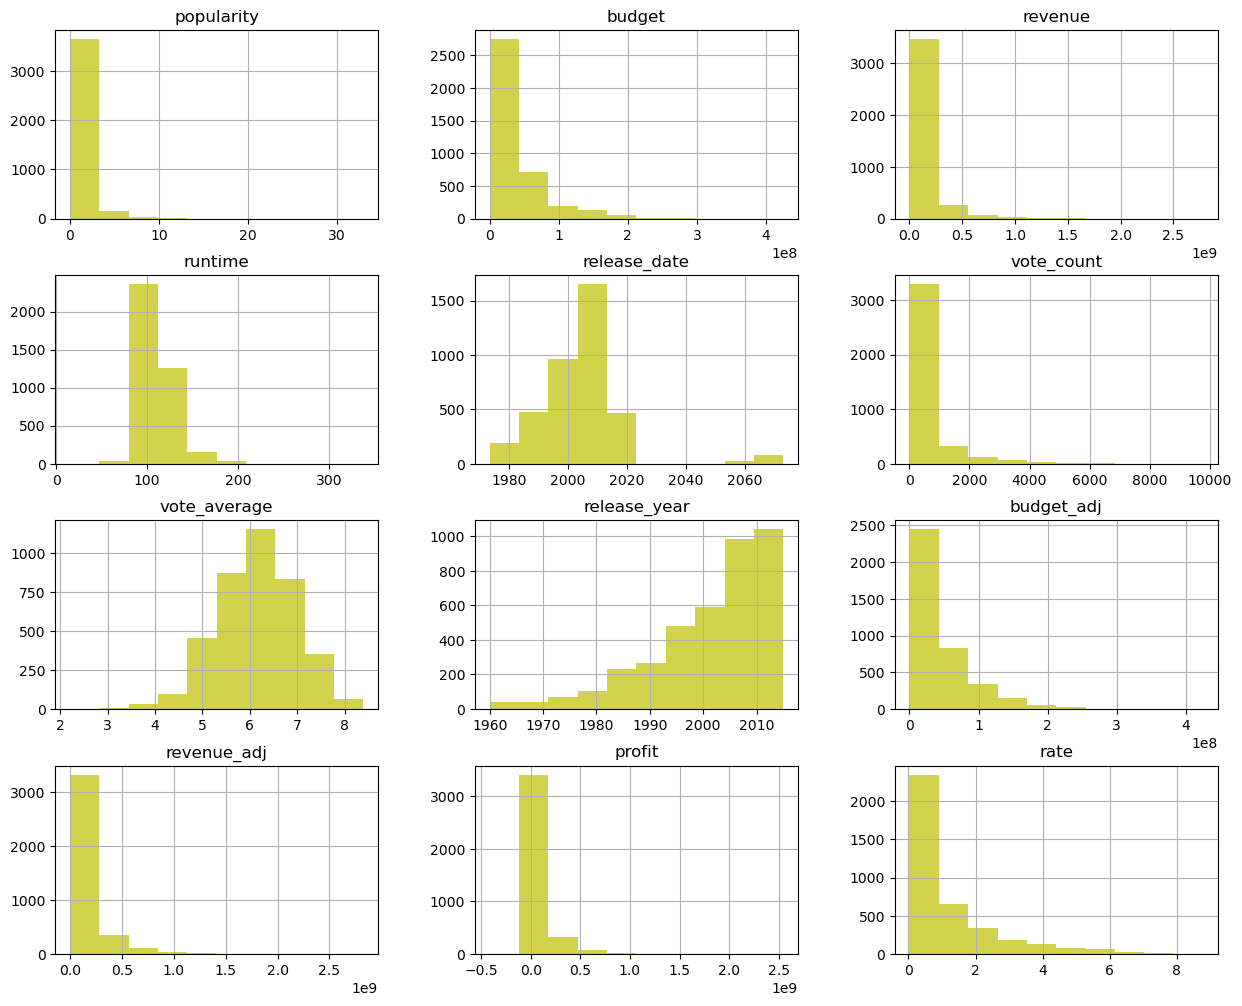

In [1636]:
# Display distribution:

df.hist(figsize=[15,12],color='y',alpha=.7);

Most movies released in a decade is 1460.
Lowest movies released in a decade is 71.


,original_title
decade,
1960's,71
1970's,133
1980's,395
1990's,755
2000's,1460
2010's,1040


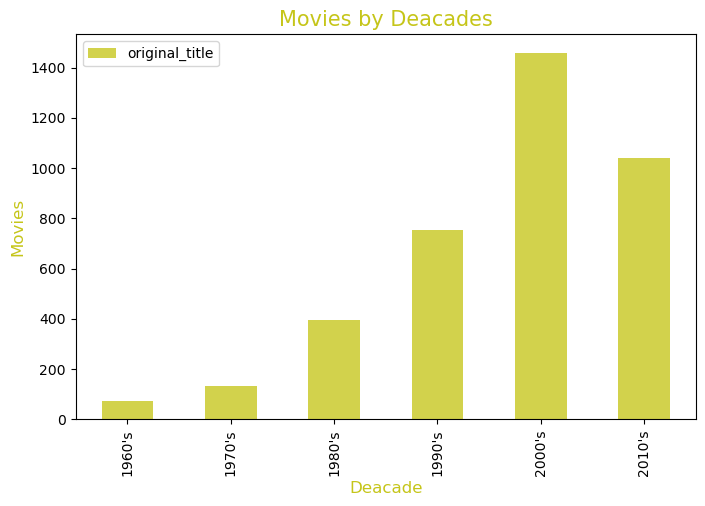

In [1637]:
# See which decade had the most movies released:

movies_decade = df.sort_values(['original_title'],ascending=False).groupby('decade').original_title.count()

#----------------------------------------------------------------------------------#

# make a dataframe:
movies_decade = pd.DataFrame(movies_decade)


#----------------------------------------------------------------------------------#

# Plot movies by decades:
movies_decade.plot(stacked=True,
                   figsize=[8,5],
                   kind='bar',
                   color='y',
                   alpha = 0.7)

plt.title('Movies by Deacades',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Deacade',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('Movies',
           fontsize=12,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:

print('Most movies released in a decade is {}.'
      .format(movies_decade['original_title'].max()))

print('Lowest movies released in a decade is {}.'
      .format(movies_decade['original_title'].min()))

movies_decade

#### So..
>
##### The Decade wiche had the most released movies is **2,000's** with **1,460 movies**.

### 2010's Decade vs. Profit: *Get Profitable (Study Decade)*
2) Is 2000's decade having the most profit average?

The highest profit in a decade is: 92688319.42596154.


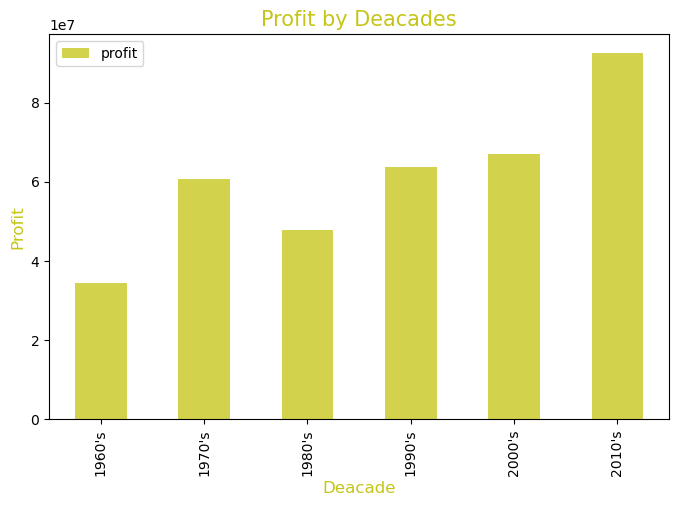

In [1638]:
# See which decade had the highest profit:

profit_decade = df.sort_values(['profit'],ascending=False).groupby('decade').profit.mean()

# Make a dataframe:
profit_decade = pd.DataFrame(profit_decade)

#----------------------------------------------------------------------------------#

# Plot profit by decades:
profit_decade.plot(stacked=True,
                   figsize=[8,5],
                   kind='bar',
                   color='y',
                   alpha = 0.7)

plt.title('Profit by Deacades',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Deacade',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('Profit',
           fontsize=12,
           color='y',
           alpha=.9);
#----------------------------------------------------------------------------------#

# Print some words:

print('The highest profit in a decade is: {}.'
      .format(profit_decade['profit'].max()))


#### So..
>
##### The **most profitable** decade **is not same** the **most released movies** decade.

### Study Decade vs. Rate:
3) Does highest-profit movie in most profitable decade has highest-rated ever?

Here are top 5 highest-profit movie in most prrofitable decade:



,profit
original_title,
Star Wars: The Force Awakens,1.868178e+09
Jurassic World,1.363529e+09
Furious 7,1.316249e+09
The Avengers,1.299558e+09
Harry Potter and the Deathly Hallows: Part 2,1.202818e+09


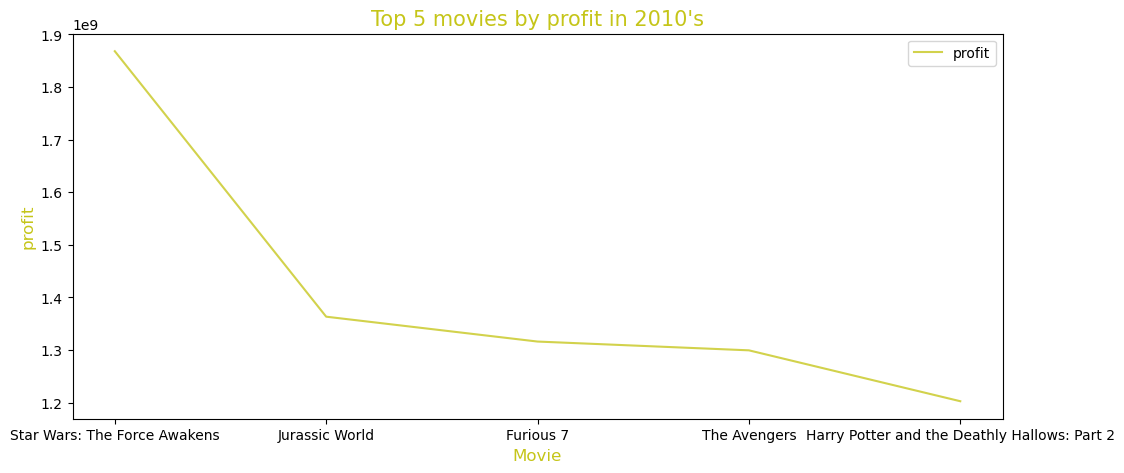

In [1639]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# Make a dataframe of 2010's decade:
df_decade = df[df['decade']=='2010\'s']

#----------------------------------------------------------------------------------#

# Find highest-profit movies:
df_decade = df_decade.nlargest(5, 'profit')

#----------------------------------------------------------------------------------#

# Group by movies title:
df_decade = (
    
    pd.DataFrame(df_decade
                 .groupby('original_title')
                 .mean()['profit'])
    
)

#----------------------------------------------------------------------------------#

# Order values to show:
df_decade = (
    
    df_decade.sort_values('profit',ascending=False)

)

#----------------------------------------------------------------------------------#

# Plot results:
df_decade.plot(xticks=np.arange(5),
                    color='y',
                    alpha=.7,
                    figsize=[12,5])

plt.title('Top 5 movies by profit in 2010\'s',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Movie',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('profit',
           fontsize=12,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:
print('Here are top 5 highest-profit movie in most prrofitable decade:\n')
df_decade.head()


Here are top 5 highest-profit movie by rate:



,rate
original_title,
Inception,8.781349
The Avengers,8.542452
Avatar,8.406433
The Dark Knight,8.398183
Django Unchained,8.030753


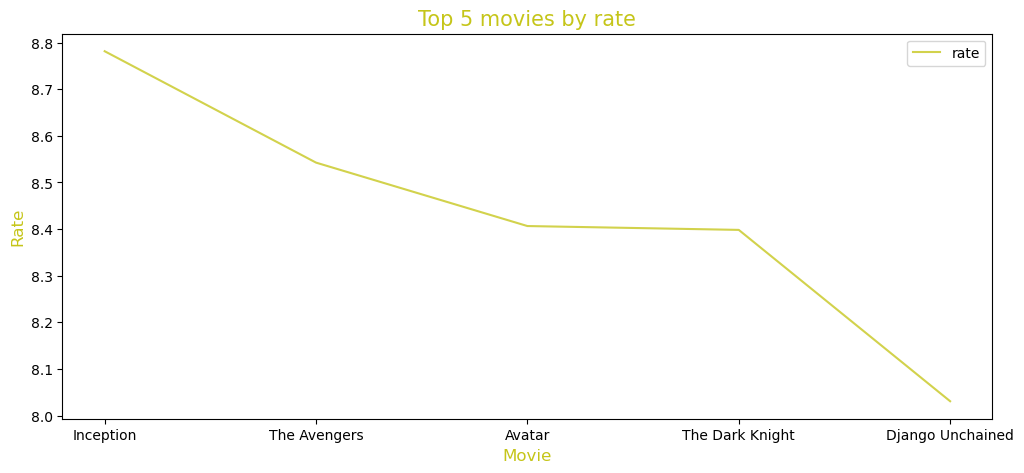

In [1640]:
# Find highest-rated movie ever:
highest_rated = df.nlargest(5, 'rate')

# 
highest_rated = pd.DataFrame(highest_rated.groupby('original_title').mean()['rate'])

# 
highest_rated = highest_rated.sort_values('rate',ascending=False)

# 
highest_rated.plot(xticks=np.arange(5),
                   color='y',
                   alpha=.7,
                   figsize=[12,5])

plt.title('Top 5 movies by rate',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Movie',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('Rate',
           fontsize=12,
           color='y',
           alpha=.9);

#
print('Here are top 5 highest-profit movie by rate:\n')
highest_rated.head()

#### So..
>
##### **Star Wars: The Force Awakens** is the **highest movie-profit in 2010's decade** and it has not **highest movie-rated ever** but **Inception**.

### Profit vs. Popularity:
4) Is there a correlation between top 100 high-profit movies in 2010's decade and popularity?

The correlation is 0.3700994759161489


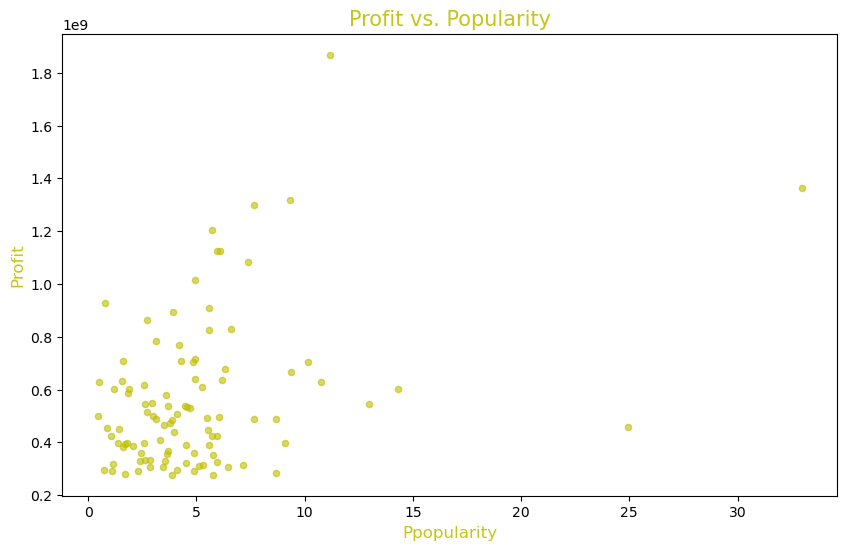

In [1641]:
# Redefine df_decade:

df_decade = df[df['decade']=='2010\'s']

#----------------------------------------------------------------------------------#

# Find top 100 high-profit movies in 2010's decade:

highest_profit = df_decade.nlargest(100, 'profit')

#----------------------------------------------------------------------------------#


# Plot results:
highest_profit.plot.scatter(x='popularity',
                          y='profit',
                          color='y',
                          alpha=.6,
                          figsize=[10,6])

plt.title('Profit vs. Popularity',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Ppopularity',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('Profit',
           fontsize=12,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:
print('The correlation is {}'.format( highest_profit['profit'].corr(highest_profit['popularity'])))

#### So..
>
##### There is a **correlation** between top **100 high-profit movies in 2010's decade** and **popularity** and it's **positive** by **0.37**.

### Popularity vs. Genres:
5) In that decade, which is the most popular genre among the movies whose popularity exceeded third quartile?
6) How many movies belong to this genre according to this measure?

Here are top 5 genres:



,genre,count
0,Action,118
1,Adventure,95
2,Drama,93
3,Thriller,83
4,Comedy,70


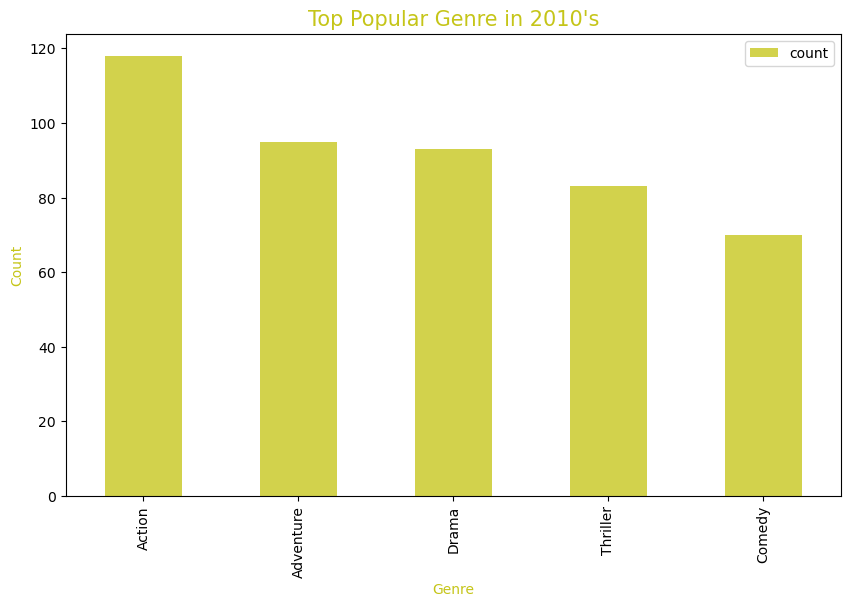

In [1642]:
# Make a datafarme of third quaryile:

high_pop = df_decade['popularity'].quantile([.75])
high_pop = int(high_pop)

df_dec_pop = df_decade.query('popularity>=@high_pop')

#----------------------------------------------------------------------------------#

# Split genres by '|' then use explode method to count each distinct genre: 
genre_count = (
    
    df_dec_pop['genres'].str.split('|')
    .explode()
    .value_counts()
    .rename_axis('genre')
    .reset_index(name='count')
    
              )

#----------------------------------------------------------------------------------#

# Plot results:
genre_count.head().plot(kind='bar',
                        x='genre',
                        y='count',
                        color='y',
                        alpha=.7,
                        figsize=[10,6])

plt.title('Top Popular Genre in 2010\'s',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Genre',
           fontsize=10,
           color='y',
           alpha=.9)

plt.ylabel('Count',
           fontsize=10,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:
print('Here are top 5 genres:\n')
genre_count.head()



#### So..
>
##### **Most popular genre** in **2010's** decade among the movies whose popularity **exceeded third quartile** is **Action** with **118 movies**.

### Production Companies vs. Profit:
7) In 2010's, What highest 5 companies contributed to the most profitable movies (as a count)?
8) And which one got highest profit? Is there a corelation between number of companies and profit?
9) Is there a corelation between number of co-production companies and high profits?

Here are top production companies contributed to the most profitable movies:



,company,count
0,Universal Pictures,55
1,Warner Bros.,55
2,Columbia Pictures,48
3,Relativity Media,44
4,Paramount Pictures,43


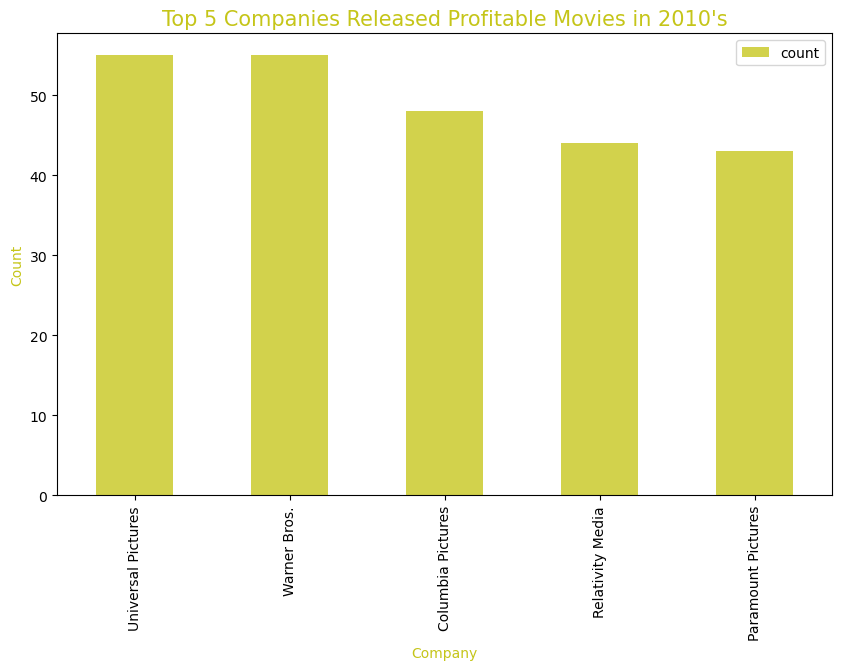

In [1643]:
# Find the minimum popularity rate of highest 25% of profit:

high_profit = df_decade['profit'].quantile([.75])

high_profit = int(high_profit)

df_dec_h_profit = df_decade.query('profit>=@high_pop')

#----------------------------------------------------------------------------------#

# Split company names by '|' then use explode method to count each distinct company: 
prod_comp_count = (
    
    df_dec_h_profit['production_companies'].str.split('|')
    .explode()
    .value_counts()
    .rename_axis('company')
    .reset_index(name='count')
    
              )

#----------------------------------------------------------------------------------#

# Plot result:

prod_comp_count.head().plot(kind='bar',
                        x='company',
                        y='count',
                        color='y',
                        alpha=.7,
                        figsize=[10,6])

plt.title('Top 5 Companies Released Profitable Movies in 2010\'s',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Company',
           fontsize=10,
           color='y',
           alpha=.9)

plt.ylabel('Count',
           fontsize=10,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:
print('Here are top production companies contributed to the most profitable movies:\n') 
prod_comp_count.head()

Here is top 5 companies by profit:



,company,profit
0,Universal Pictures,10748710683
1,Warner Bros.,10008404604
2,Columbia Pictures,8920486355
4,Paramount Pictures,8241885110
3,Relativity Media,4143687591


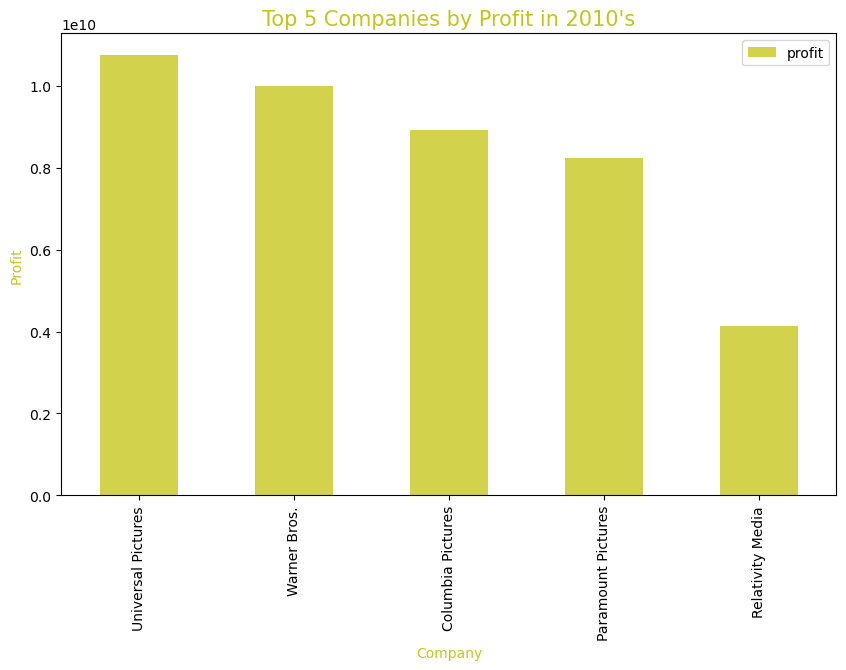

In [1644]:
# Make a mask dataframe for 'company' and 'profit'>>  

## First make a list of top production companies contributed to the most profitable movies in 2010's decade:

comp_list = (
    prod_comp_count['company']
    .head()
    .tolist
)


### And make mask list:

profit_list = []

#### Then use for over the list for extract a list of companies profit:
for c in comp_list():
    for_result = (
        df_decade
        .query('production_companies.str.contains(@c)')
    )
        
##### And fill in the empty list with for result:        
    profit_list.append(for_result['profit'].sum())

###### Then put tow lists in a dict to make a dataframe from it:
dict = {'company': comp_list(), 'profit':profit_list}


####### Finally make a dataframe from the dict:

df_c_profit = pd.DataFrame(dict).sort_values('profit',ascending=False)

#----------------------------------------------------------------------------------#

# Plot result:

df_c_profit.head().plot(kind='bar',
                        x='company',
                        y='profit',
                        color='y',
                        alpha=.7,
                        figsize=[10,6])

plt.title('Top 5 Companies by Profit in 2010\'s',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Company',
           fontsize=10,
           color='y',
           alpha=.9)

plt.ylabel('Profit',
           fontsize=10,
           color='y',
           alpha=.9);

#----------------------------------------------------------------------------------#

# Print some words:

print('Here is top 5 companies by profit:\n')
df_c_profit.head()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_25176\1669592577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['comp_count'] = df_decade['production_companies'].str.split('|');
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_25176\1669592577.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['comp_count'] = df_decade['comp_count'].str.len();


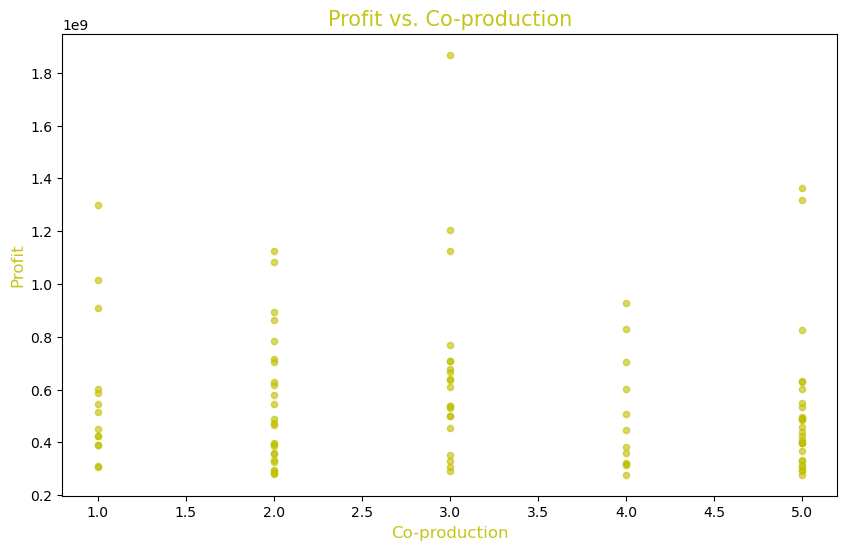

Here are the categories of co-productions companies by number, high-profit films released and profit average:



,movie_count,profit_avg
comp_count,,
3,21,6.644261e+08
1,14,5.833636e+08
2,25,5.463726e+08
5,28,5.120826e+08
4,12,4.996178e+08


In [1645]:
# Extract 'comp_count' to classify co-production by the number of companies>>

## First split 'production_companies' by sep '|' to return a column contains lists of company names:

df_decade['comp_count'] = df_decade['production_companies'].str.split('|');


### Then convert the column to count of list elements:
df_decade['comp_count'] = df_decade['comp_count'].str.len();

#----------------------------------------------------------------------------------#

# Now define 'highest_profit' again:

highest_profit = pd.DataFrame(df_decade.nlargest(100, 'profit'));

#----------------------------------------------------------------------------------#

# Plot corelation:
highest_profit.plot.scatter(x='comp_count',
                          y='profit',
                          color='y',
                          alpha=.6,
                          figsize=[10,6])

plt.title('Profit vs. Co-production',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Co-production',
           fontsize=12,
           color='y',
           alpha=.9)

plt.ylabel('Profit',
           fontsize=12,
           color='y',
           alpha=.9)
plt.show();

#----------------------------------------------------------------------------------#

# Group by to show table:

highest_profit = (
                  pd.DataFrame
                  (highest_profit
                   .groupby('comp_count')
                   .agg(
             movie_count = ('id', 'count'),
             profit_avg = ('profit', 'mean')
                       )
                   )
                  );

#----------------------------------------------------------------------------------#

# Sort by profit average:

highest_profit = highest_profit.sort_values('profit_avg', ascending=False);

#----------------------------------------------------------------------------------#

# Print some words:

print('Here are the categories of co-productions companies by number, high-profit films released and profit average:\n');
highest_profit

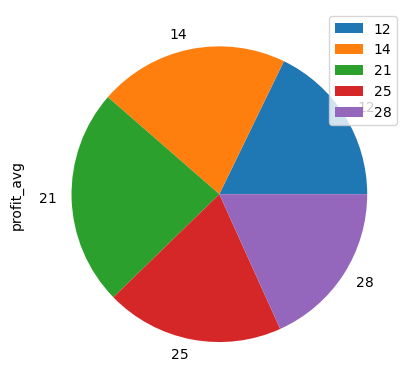

The pie chart shows how many movies each category released and the weight of their profits:



,movie_count,profit_avg
comp_count,,
3,21,6.644261e+08
1,14,5.833636e+08
2,25,5.463726e+08
5,28,5.120826e+08
4,12,4.996178e+08


In [1646]:
# Plot pie chart:

highest_profit.groupby(['movie_count']).sum().plot(kind='pie', y='profit_avg')
 
    
## Show plot:

plt.show();

#----------------------------------------------------------------------------------#

# Print some words:

print('The pie chart shows how many movies each category released and the weight of their profits:\n')
highest_profit

#### So..
>
#####
 + The **top 5 companies** contributed to **biggest number** of profitable movies is: **(Universal Pictures, Warner Bros., Columbia Pictures, Paramount Pictures and Relativity Media)**.
 + And **Universal Pictures** got **highest profit**.
 + Co-productions with **five companies** contributed to the **release** of more of the top 100 films with **28 movies**, while co-productions with **three companies** have the **highest average** profits with **6.644261e+08**.)

### Runtime vs. Rate:
10) How has movie ratings - in all decades - affected by movie length?
11) What about our decade under study?

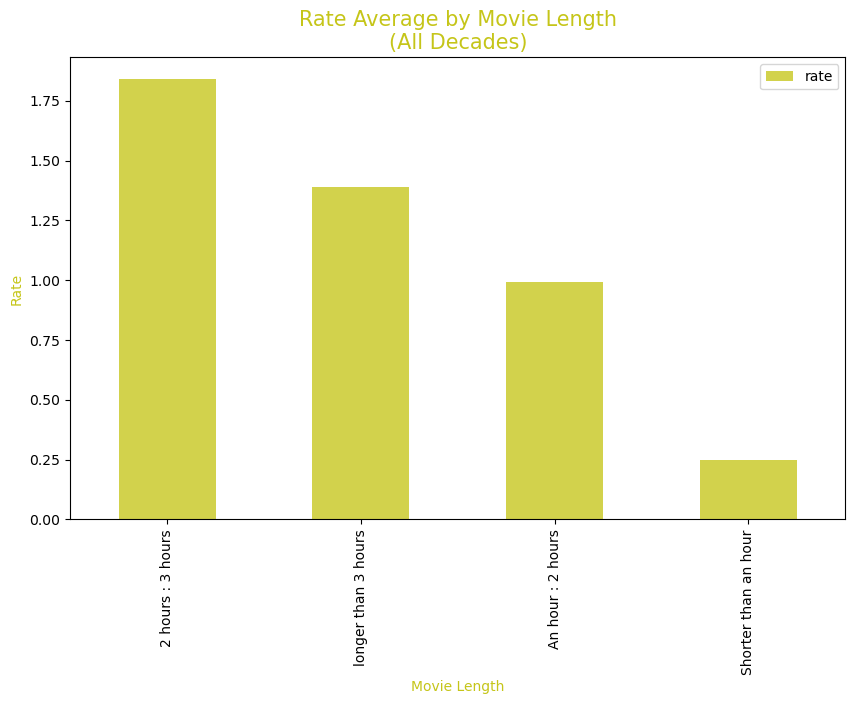

Rate average by movie length among all decades is:



,rate
movie_length,
2 hours : 3 hours,1.839673
longer than 3 hours,1.391171
An hour : 2 hours,0.991704
Shorter than an hour,0.247713


In [1647]:
# Extract 'movie_length' from 'runtime'>>

## First make conditions list:

conditions = [
    (df['runtime'] <= 60),
    (df['runtime'] > 60) & (df['runtime'] <= 120),
    (df['runtime'] > 120) & (df['runtime'] <= 180),
    (df['runtime'] > 180)
     ]


### Then make values list:

values = [
    'Shorter than an hour',
    'An hour : 2 hours',
    '2 hours : 3 hours',
    'longer than 3 hours'
]


#### Finaly use 'np.select' function to extract the column:

df['movie_length'] = np.select(conditions, values)

#----------------------------------------------------------------------------------#

# Make a mask dataframe for 'movie_length' and 'rate'>>

## First group by 'movie_length' to show 'rate' average:

len_rate = df.groupby(['movie_length']).rate.mean()


### Then make dataframe:

len_rate = pd.DataFrame(len_rate)


#### Finaly sort by 'rate' average:

len_rate = len_rate.sort_values('rate',ascending=False)

#----------------------------------------------------------------------------------#

# Plot result:
len_rate.plot(kind='bar',
                        color='y',
                        alpha=.7,
                        figsize=[10,6])

plt.title('Rate Average by Movie Length\n(All Decades)',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Movie Length',
           fontsize=10,
           color='y',
           alpha=.9)

plt.ylabel('Rate',
           fontsize=10,
           color='y',
           alpha=.9);
plt.show();

#----------------------------------------------------------------------------------#

# Print some woords:
print('Rate average by movie length among all decades is:\n')
len_rate

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_25176\3813894829.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['decade_movie_length'] = np.select(decade_conditions, decade_values);


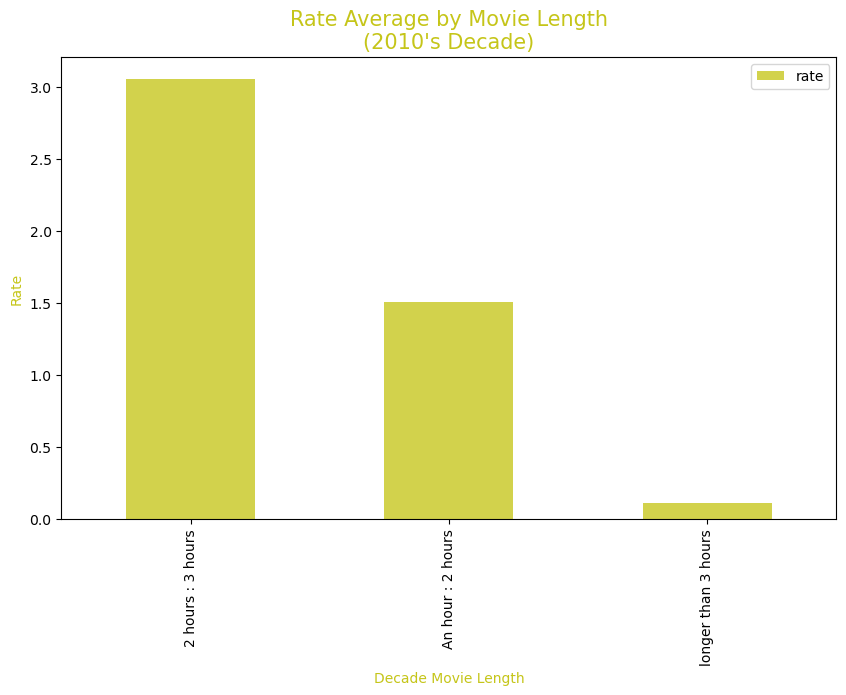

Rate average by movie length among 2010's decade is:



,rate
decade_movie_length,
2 hours : 3 hours,3.057348
An hour : 2 hours,1.509798
longer than 3 hours,0.108241


In [1648]:
# Decade dataframe:

df_decade = df[df['decade']=='2010\'s']

#----------------------------------------------------------------------------------#

# Extract 'decade_movie_length' from 'runtime'>>
## We can repeat previous steps with some changes:

### First make conditions list:

decade_conditions = [
    (df_decade['runtime'] <= 60),
    (df_decade['runtime'] > 60) & (df_decade['runtime'] <= 120),
    (df_decade['runtime'] > 120) & (df_decade['runtime'] <= 180),
    (df_decade['runtime'] > 180)
     ]


#### Then make values list:

decade_values = [
    'Shorter than an hour',
    'An hour : 2 hours',
    '2 hours : 3 hours',
    'longer than 3 hours'
]


##### Finaly use 'np.select' function to extract the column:

df_decade['decade_movie_length'] = np.select(decade_conditions, decade_values);

#----------------------------------------------------------------------------------#

# Make a mask dataframe for 'decade_movie_length' and 'rate'>>

## First group by 'decade_movie_length' to show 'rate' average:

decade_len_rate = df_decade.groupby(['decade_movie_length']).rate.mean()


### Then make dataframe:

decade_len_rate = pd.DataFrame(decade_len_rate)


#### Finaly sort by 'rate' average:

decade_len_rate = decade_len_rate.sort_values('rate',ascending=False)

#----------------------------------------------------------------------------------#

# Plot result:
decade_len_rate.plot(kind='bar',
                        color='y',
                        alpha=.7,
                        figsize=[10,6])

plt.title('Rate Average by Movie Length\n(2010\'s Decade)',
          fontsize=15,
          color='y',
          alpha=.9)

plt.xlabel('Decade Movie Length',
           fontsize=10,
           color='y',
           alpha=.9)

plt.ylabel('Rate',
           fontsize=10,
           color='y',
           alpha=.9)
plt.show();

#----------------------------------------------------------------------------------#

# Print some woords:
print('Rate average by movie length among 2010\'s decade is:\n')
decade_len_rate

#### So..
>
#####
 + The **movies** with the **highest average ratings** among **all decades** are **2 hours : 3 hours** with an average **1.168465** .
 + The movies with the highest rating in the **2010's** are the **same category** with an average **2.015278**.

### Proposed Research
> - What is the difference between the adjusted profit to budget and the profit to budget?

In [1649]:
# Decade dataframe:

df_decade = df[df['decade']=='2010\'s']

#----------------------------------------------------------------------------------#

# Find profit vs. budget:

profit_percentage = (
    (df_decade['profit']
     .sum()
    )
    / 
    (df_decade['budget']
     .sum()
    )
                    )

#----------------------------------------------------------------------------------#

# Extract 'profit_adj':

df_decade['profit_adj'] = df_decade['revenue_adj'] - df_decade['budget_adj']

#----------------------------------------------------------------------------------#

# Find profit adj vs. budget adj:

profit_adj_percentage = (
    (df_decade['profit_adj']
    .sum()
    )
    / 
    (df_decade['budget_adj']
     .sum()
    )
)

#----------------------------------------------------------------------------------#

# Find difference:
difference = profit_percentage - profit_adj_percentage

#----------------------------------------------------------------------------------#

# Print some words:
print('The difference between the adjusted profit to budget and the profit to budget is {}\n'.format(difference))


The difference between the adjusted profit to budget and the profit to budget is 0.008703371028508933



C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_25176\3584791297.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['profit_adj'] = df_decade['revenue_adj'] - df_decade['budget_adj']


<a id='conclusions'></a>
## Conclusions
> ### We have arrived!
> - The Decade wiche had the most released movies is **2,000's** with **1,460 movies**.
>
> - ***Contrary to what I assumed at the beginning***, the **most profitable** decade **is not same** the **most released movies** decade.
>
> - **Star Wars: The Force Awakens** is the **highest movie-profit in 2010's decade** and it has not **highest movie-rated ever** but **Inception**.
>
> - There is a **correlation** between top **100 high-profit movies in 2010's decade** and **popularity** and it's **positive** by **0.37**.
>
> - **Most popular genre** in **2010's** decade among the movies whose popularity **exceeded third quartile** is **Action** with **118 movies**.
>
> - + The **top 5 companies** contributed to **biggest number** of profitable movies is: **(Universal Pictures, Warner Bros., Columbia Pictures, Paramount Pictures and Relativity Media)**.
>   + And **Universal Pictures** got **highest profit**.
>   + Co-productions with **five companies** contributed to the **release** of more of the top 100 films with **28 movies**, while co-productions with **three companies** have the **highest average** profits with **6.644261e+08**..
>
> - + The **movies** with the **highest average ratings** among **all decades** are **2 hours : 3 hours** with an average **1.168465**.
>   + The movies with the highest rating in the **2010's** are the **same category** with an average **2.015278**.
>
> - There is a **difference** between the **adjusted profit to adjusted budget** and the **profit to budget**, it is **0.008703371028508933**, What is the explanation for this, I think this needs **more research**!